# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset.

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [14]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [15]:
# Inspect the shapes of the datasets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

print(y_train[0],y_test[0])


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


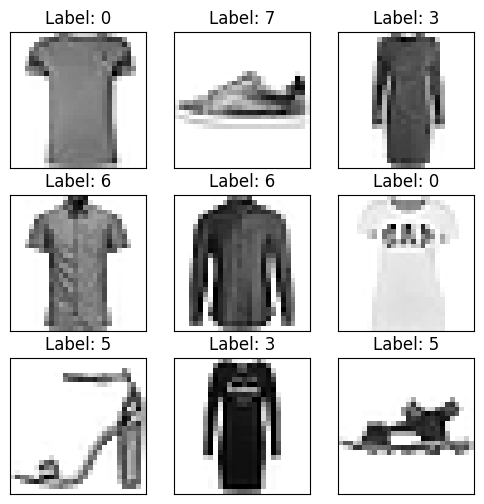

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Verify the data looks as expected
# Selecting 9 random indices
random_indices = np.random.choice(len(X_train), 9, replace=False)

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[random_indices[i]], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f"Label: {train_labels[random_indices[i]]}")

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**

9 randomly selected images are displayed above. The data looks expected and most of the labels match the images.
The image quality is not good. For example, it is hard to recognize the 2nd one as a shirt. It is more like a T-shirt to me.

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Flatten


# Create a simple linear regression model
model = Sequential([Flatten(input_shape=(X_train.shape[1], X_train.shape[2]))])

# You can use `model.add(<layer>)` to add layers to the model
model.add(Dense(len(class_names)))

# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

# Train the model with `model.fit()`
model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=320, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0908 - loss: 7.8730 - val_accuracy: 0.0954 - val_loss: 8.3862
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0944 - loss: 9.5662 - val_accuracy: 0.0964 - val_loss: 9.7982
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0926 - loss: 9.7205 - val_accuracy: 0.0972 - val_loss: 9.7066
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0937 - loss: 9.6918 - val_accuracy: 0.0981 - val_loss: 9.6904
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0951 - loss: 9.6290 - val_accuracy: 0.0990 - val_loss: 9.6930
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0941 - loss: 9.7319
Loss:     9.74
Accuracy: 9.65%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**

As expected, the baseline model performance is terrible.
As the relationship between pixels and lables is not linear, the model can't identify the patterns in the input due to the lack of non-linear activation function. As a result, it can't make the right predictions.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [29]:
from keras.layers import Conv2D
from tensorflow.keras.optimizers import SGD

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
    # MaxPooling2D(pool_size=(2, 2)),  # Downsample feature maps
    # Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    # MaxPooling2D(pool_size=(2, 2)),
    Flatten(),  # Flatten for dense layers
    # Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Train the model
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=SGD(learning_rate = 0.03, momentum=0.8), # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=15, # Number of epochs
    batch_size=320, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.6648 - loss: 1.0192 - val_accuracy: 0.8322 - val_loss: 0.4829
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.8333 - loss: 0.4823 - val_accuracy: 0.8508 - val_loss: 0.4313
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 136ms/step - accuracy: 0.8515 - loss: 0.4305 - val_accuracy: 0.8592 - val_loss: 0.4132
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 18s 120ms/step - accuracy: 0.8668 - loss: 0.3852 - val_accuracy: 0.8673 - val_loss: 0.3841
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 132ms/step - accuracy: 0.8740 - loss: 0.3678 - val_accuracy: 0.8715 - val_loss: 0.3728
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.8794 - loss: 0.3519 - val_accuracy: 0.8694 - val_loss: 0.3685
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.8820 - loss: 0.3359 - val_accuracy: 0.8767 - val_loss: 0.3491
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.8874 - loss: 0

Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**

The CNN model performs much better than the baseline mode with much higher accuracy and much lower loss. The CNN model layer, relu and softmax activation functions contribute to the improvement.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [30]:
# A. Test Hyperparameters
loss_dict = {}
accuracy_dict = {}
for i in range(32,128,32):
  # Create a simple CNN model
  model = Sequential([
      Conv2D(filters=i, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'),
      Flatten(),  # Flatten for dense layers
      Dense(10, activation='softmax')  # Output layer for 10 classes
  ])

  # Train the model
  model.compile(
      loss='categorical_crossentropy', # Loss function
      optimizer=SGD(learning_rate = 0.03, momentum=0.8), # Optimizer
      metrics=['accuracy'] # Metrics to evaluate the model
  )

  model.fit(
      X_train, # Training data
      y_train, # Training labels
      epochs=15, # Number of epochs
      batch_size=320, # Number of samples per batch
      validation_split=0.2 # Use 20% of the data for validation
  )

  # Evaluate the model
  loss, accuracy = model.evaluate(X_test, y_test)
  loss_dict[i] = loss
  accuracy_dict[i] = accuracy

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.6591 - loss: 0.9934 - val_accuracy: 0.8247 - val_loss: 0.4936
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 125ms/step - accuracy: 0.8331 - loss: 0.4856 - val_accuracy: 0.8247 - val_loss: 0.4903
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 111ms/step - accuracy: 0.8510 - loss: 0.4315 - val_accuracy: 0.8600 - val_loss: 0.4099
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.8620 - loss: 0.4022 - val_accuracy: 0.8605 - val_loss: 0.3944
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 120ms/step - accuracy: 0.8697 - loss: 0.3726 - val_accuracy: 0.8668 - val_loss: 0.3765
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8769 - loss: 0.3552 - val_accuracy: 0.8753 - val_loss: 0.3631
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 131ms/step - accuracy: 0.8851 - loss: 0.3358 - val_accuracy: 0.8767 - val_loss: 0.3527
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 125ms/step - accuracy: 0.8847 - loss: 0

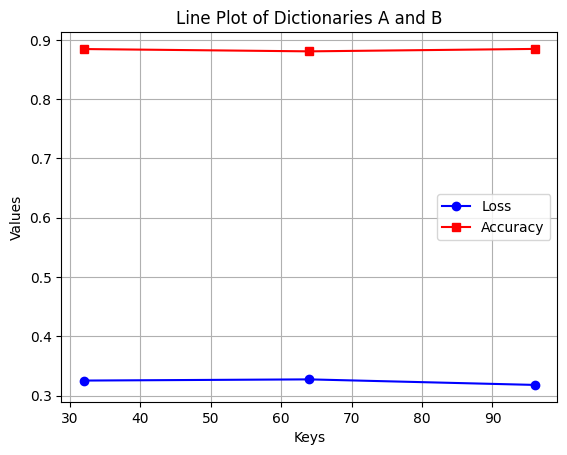

In [31]:
import matplotlib.pyplot as plt

# Extract keys and values
x = list(loss_dict.keys())  # [32, 64, 96]
y_a = list(loss_dict.values())  # Values from dictionary a
y_b = list(accuracy_dict.values())  # Values from dictionary b

# Create the plot
plt.plot(x, y_a, marker='o', label='Loss', color='blue')  # Line for dictionary a
plt.plot(x, y_b, marker='s', label='Accuracy', color='red')   # Line for dictionary b

# Customize the plot
plt.xlabel('Keys')
plt.ylabel('Values')
plt.title('Line Plot of Dictionaries A and B')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [34]:
# B. Test presence or absence of regularization

from tensorflow.keras.regularizers import l2

# Create a simple CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
           input_shape=(28, 28, 1), padding='same',
           kernel_regularizer=l2(0.002)),
    Flatten(),  # Flatten for dense layers
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Train the model
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=SGD(learning_rate = 0.03, momentum=0.8), # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=15, # Number of epochs
    batch_size=320, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.6637 - loss: 0.9817 - val_accuracy: 0.8275 - val_loss: 0.4934
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 19s 124ms/step - accuracy: 0.8306 - loss: 0.5006 - val_accuracy: 0.8503 - val_loss: 0.4446
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 125ms/step - accuracy: 0.8508 - loss: 0.4443 - val_accuracy: 0.8455 - val_loss: 0.4556
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.8623 - loss: 0.4209 - val_accuracy: 0.8589 - val_loss: 0.4134
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.8671 - loss: 0.4000 - val_accuracy: 0.8650 - val_loss: 0.3972
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 126ms/step - accuracy: 0.8780 - loss: 0.3712 - val_accuracy: 0.8726 - val_loss: 0.3796
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 127ms/step - accuracy: 0.8817 - loss: 0.3614 - val_accuracy: 0.8776 - val_loss: 0.3671
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.8831 - loss: 0

Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
I tried different filters in the CNN model: 32, 64, 96. The performance is slightly improved when the filter value is set to 96.
I also tried l2 regulation l2(0.01),l2(0.005),l2(0.002) and 0.002 produces the best performance but it is slightly worse than that when l2 regulation is not implemented. If I had more time, I would decrease it to 0.001 for more testing.
Both filter size and l2 regulation can contribute to the performace improvement.
filters = 96, l2(0.002) in my testing can yield the best performance.

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

In [35]:
# Set filters = 96; kernel_regularizer=l2(0.002)
#  Create a simple CNN model
model = Sequential([
    Conv2D(filters=96, kernel_size=(3, 3), activation='relu',
           input_shape=(28, 28, 1), padding='same',
           kernel_regularizer=l2(0.002)),
    Flatten(),  # Flatten for dense layers
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Train the model
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer=SGD(learning_rate = 0.03, momentum=0.8), # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

model.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=15, # Number of epochs
    batch_size=320, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 53s 347ms/step - accuracy: 0.6668 - loss: 0.9772 - val_accuracy: 0.8342 - val_loss: 0.4866
Epoch 2/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 354ms/step - accuracy: 0.8291 - loss: 0.5003 - val_accuracy: 0.8491 - val_loss: 0.4511
Epoch 3/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 81s 345ms/step - accuracy: 0.8516 - loss: 0.4408 - val_accuracy: 0.8504 - val_loss: 0.4383
Epoch 4/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 371ms/step - accuracy: 0.8647 - loss: 0.4084 - val_accuracy: 0.8660 - val_loss: 0.3986
Epoch 5/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 78s 344ms/step - accuracy: 0.8720 - loss: 0.3842 - val_accuracy: 0.8758 - val_loss: 0.3843
Epoch 6/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 86s 372ms/step - accuracy: 0.8773 - loss: 0.3766 - val_accuracy: 0.8749 - val_loss: 0.3718
Epoch 7/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 52s 349ms/step - accuracy: 0.8812 - loss: 0.3559 - val_accuracy: 0.8753 - val_loss: 0.3753
Epoch 8/15
150/150 ━━━━━━━━━━━━━━━━━━━━ 80s 334ms/step - accuracy: 0.8851 - loss: 0

Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
The final model's performance is much better than the baseline model, but slightly worse than the CNN model with the same filters without l2 regulation enabled. I think this is probably due to the l2 value not optimized.

If I had more time, I would try adding more layers, different values for l2 regulation, dropout regulation and different activation functions like sigmoid and tanh.

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.